In [1]:
from DataFetcher import DataFetcher
from USTs import USTs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [2]:
auctions = DataFetcher().fetch_auction_data()
prices = DataFetcher().fetch_historical_UST_data(date=datetime.datetime(year=2025, month=6, day=23))

In [12]:
ust_set = USTs(auction_data=auctions, price_data=prices)
ust_set = ust_set.get_current_UST_set(as_of_date=datetime.date(2025, 6, 24),
                                      get_ytms=True, include_FRNs=False, include_TIPS=False)

1.3296703296703296
1.3296703296703296
1.3296703296703296
1.3296703296703296
1.3296703296703296
1.3296703296703296
0.12087912087912088
0.12087912087912088
0.12087912087912088
0.12087912087912088
0.12087912087912088
0.12087912087912088
2.2362637362637363
2.2362637362637363
2.2362637362637363
2.2362637362637363
2.2362637362637363
2.2362637362637363
1.3259668508287292
1.3259668508287292
1.3259668508287292
1.3259668508287292
1.3259668508287292
1.3259668508287292
0.09944751381215469
0.09944751381215469
0.09944751381215469
0.09944751381215469
0.09944751381215469
0.09944751381215469
1.143646408839779
1.143646408839779
1.143646408839779
1.143646408839779
1.143646408839779
1.143646408839779
1.8895027624309393
1.8895027624309393
1.8895027624309393
1.8895027624309393
1.8895027624309393
1.8895027624309393
0.7078651685393258
0.7078651685393258
0.7078651685393258
0.7078651685393258
0.7078651685393258
0.7078651685393258
1.1060393258426966
1.1060393258426966
1.1060393258426966
1.1060393258426966
1.1060

In [13]:
ust_set

,Cusip,Security type,Rate,Maturity date,Buy,Sell,End of day,security_term,issue_date,EOD YTM
0,912797PT8,Bill,0.000,2025-06-24,0.000000,99.988361,100.000000,17-Week,2025-02-25,0.000000
1,912797NW3,Bill,0.000,2025-06-26,0.000000,99.965667,99.977556,26-Week,2024-12-26,0.045000
2,912797PU5,Bill,0.000,2025-07-01,99.908778,99.908667,99.920667,17-Week,2025-03-04,0.243000
3,912797NX1,Bill,0.000,2025-07-03,99.885833,99.885556,99.897000,26-Week,2025-01-02,0.207000
4,912797PZ4,Bill,0.000,2025-07-08,99.828750,99.828333,99.840167,17-Week,2025-03-11,0.490000
...,...,...,...,...,...,...,...,...,...,...
392,912810UA4,Bond,4.625,2054-05-15,96.187500,96.156250,95.812500,30-Year,2024-05-15,4.897079
393,912810UC0,Bond,4.250,2054-08-15,90.421875,90.406250,90.062500,30-Year,2024-08-15,4.893645
394,912810UE6,Bond,4.500,2054-11-15,94.390625,94.375000,94.000000,30-Year,2024-11-15,4.886187
395,912810UG1,Bond,4.625,2055-02-15,96.437500,96.406250,96.062500,30-Year,2025-02-18,4.877338


/tmp/ipykernel_4233/3361625180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'days to expiry'] = (filtered_data['Maturity date'] - pd.Timestamp.today().normalize()).dt.days


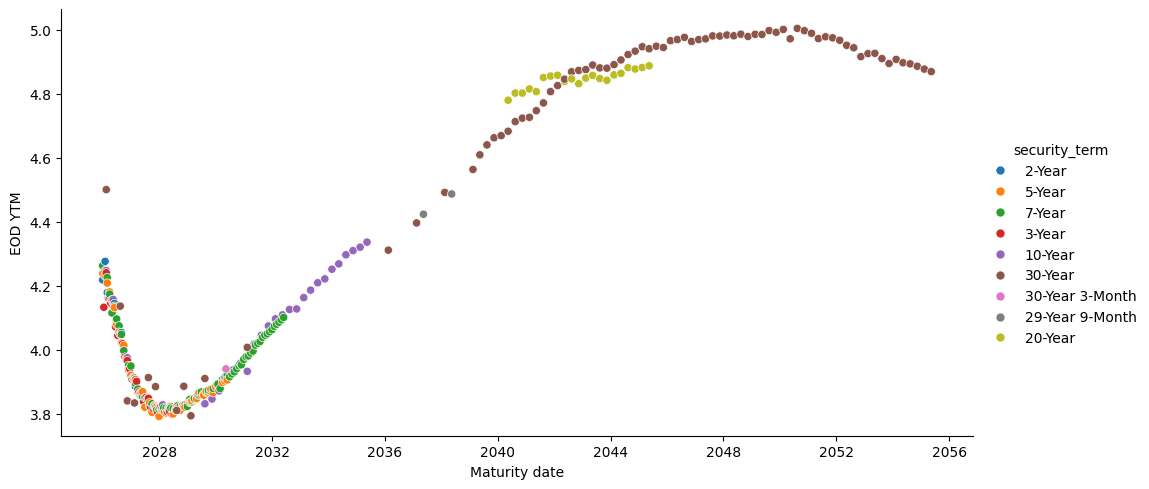

In [14]:
filtered_data = ust_set[ust_set['Security type'] != 'Bill']
filtered_data.loc[:, 'days to expiry'] = (filtered_data['Maturity date'] - pd.Timestamp.today().normalize()).dt.days
filtered_data = filtered_data[filtered_data['days to expiry'] > 180]
sns.relplot(data=filtered_data, x='Maturity date', y='EOD YTM', kind='scatter', hue='security_term', aspect=2, height=5)

In [15]:
filtered_data[filtered_data['security_term'] == '10-Year']

,Cusip,Security type,Rate,Maturity date,Buy,Sell,End of day,security_term,issue_date,EOD YTM,days to expiry
83,912828P46,Note,1.625,2026-02-15,98.375000,98.34375,98.34375,10-Year,2016-02-16,4.248023,235
96,912828R36,Note,1.625,2026-05-15,97.843750,97.81250,97.81250,10-Year,2016-05-16,4.157615,324
109,9128282A7,Note,1.500,2026-08-15,97.203125,97.18750,97.18750,10-Year,2016-08-15,4.050000,416
122,912828U24,Note,2.000,2026-11-15,97.359375,97.34375,97.34375,10-Year,2016-11-15,3.975317,508
134,912828V98,Note,2.250,2027-02-15,97.421875,97.40625,97.37500,10-Year,2017-02-15,3.912084,600
147,912828X88,Note,2.375,2027-05-15,97.328125,97.31250,97.31250,10-Year,2017-05-15,3.866796,689
158,9128282R0,Note,2.250,2027-08-15,96.796875,96.78125,96.75000,10-Year,2017-08-15,3.849979,781
168,9128283F5,Note,2.250,2027-11-15,96.484375,96.46875,96.43750,10-Year,2017-11-15,3.820693,873
178,9128283W8,Note,2.750,2028-02-15,97.375000,97.34375,97.31250,10-Year,2018-02-15,3.828332,965
188,9128284N7,Note,2.875,2028-05-15,97.500000,97.46875,97.43750,10-Year,2018-05-15,3.819783,1055
